<a href="https://colab.research.google.com/github/Rexnice/DataAnalytics/blob/master/exercise1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {​​​​​ width:100% !important; }​​​​​</style>"))

# A)
Consider the dataset 'exam_results.csv'. Compute the MEAN, the STANDARD DEVIATION and the VARIANCE of the exam grades among all students.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

exam_list = [[1, 26], [2, 24], [3, 26], [4, 24], [5, 23],
             [6, 26], [7, 24], [8, 26], [9, 27], [10, 22],
             [11, 26], [12, 22], [13, 23], [14, 23], [15, 25],
             [16, 24], [17, 27],[18, 25], [19, 23], [20, 24]]

exam_array = np.array(exam_list)
print(exam_array)

[[ 1 26]
 [ 2 24]
 [ 3 26]
 [ 4 24]
 [ 5 23]
 [ 6 26]
 [ 7 24]
 [ 8 26]
 [ 9 27]
 [10 22]
 [11 26]
 [12 22]
 [13 23]
 [14 23]
 [15 25]
 [16 24]
 [17 27]
 [18 25]
 [19 23]
 [20 24]]


In [ ]:
mean_exam = exam_array[:,1].mean()
std_exam = exam_array[:,1].std()
print('grades mean: ', mean_exam)
print('grades standard deviation: ', std_exam)
print('grades variance: ', std_exam**2)


grades mean:  24.5
grades standard deviation:  1.5329709716755893
grades variance:  2.35


# B)
The numpy std() function adopts the "biased" formula for the standard deviation, that is
$$ \sqrt{\frac{\sum\limits_{i=1,n}|x_i-\bar x|^2}{n}},$$
where $\bar x$ is the mean value computed on the sample. Since the "biased" formula tends to understimate the real standard deviation, the "unbiased" version with the Bessel's correction factor is as follows
$$ \sqrt{\frac{\sum\limits_{i=1,n}|x_i-\bar x|^2}{n-1}}.$$
Define a python function taking as input an array and prducing as output the unbiased standard deviation computed on the array elements, and use it to compute the unbiased standard deviation of the exam grades.


In [ ]:
def unbiased_std(a):
    n = a.size
    mean = a.mean()
    sum_deviations = 0
    for i in range(n):
        sum_deviations += np.abs(a[i]-mean)**2
    return np.sqrt(sum_deviations/(n-1))

print(unbiased_std(exam_array[:,1]))

1.5727950313140984


# C)
Consider the file 'student_grades.csv'. Compute the MEAN, the MEDIAN and the MODE of all the grades.

In [ ]:
grades_list = [18, 18, 23, 23, 23, 23, 24, 24, 24, 24,
        24, 25, 25, 26, 26, 26, 26, 30, 30, 30]
grades_array = np.array(grades_list)
print(grades_array)

[18 18 23 23 23 23 24 24 24 24 24 25 25 26 26 26 26 30 30 30]


In [ ]:
from scipy.stats import mode

grades_mean = np.mean(grades_array)
grades_median = np.median(grades_array)
mode_results = mode(grades_array)  # mode() returns an "ModeResult" object with attributes mode and count
print(mode_results)
grades_mode = int(mode_results.mode)
mode_occurrences = int(mode_results.count)
print('Mean: ', grades_mean)
print('Median: ', grades_median)
print(f'Mode {grades_mode} with {mode_occurrences} occurrences')

ModeResult(mode=24, count=5)
Mean:  24.6
Median:  24.0
Mode 24 with 5 occurrences


# D)
Recalling that the Gini Coefficient is computed as $$G=\frac{\sum\limits_{i=1,n}\sum\limits_{j=1,n}|x_i-x_j| }{2n\sum\limits_{i=1,n}x_i},$$ define a python function gini_coef() computing the Gini coefficient. Consider the dataset '2students_grades.csv'. Apply gini_coef() to compare the spread of the 2 students grades.

In [ ]:
def gini_coef(data):
    n = data.shape[0]
    deviations_sum = 0
    for i in range(n):
        for j in range(n):
            deviations_sum += np.abs(data[i]-data[j])
    return deviations_sum/(2*n*np.sum(data))

In [ ]:
grades_students_list = [[26, 18], [24, 18], [26, 18], [24, 18], [23, 18],
                        [26, 18], [24, 18], [26, 18], [27, 18], [22, 18],
                        [26, 18], [22, 18], [23, 18], [23, 18], [25, 18],
                        [24, 30], [27, 30], [25, 30], [23, 30], [24, 30]]
grades_students_array = np.array(grades_students_list)
print(grades_students_array)

[[26 18]
 [24 18]
 [26 18]
 [24 18]
 [23 18]
 [26 18]
 [24 18]
 [26 18]
 [27 18]
 [22 18]
 [26 18]
 [22 18]
 [23 18]
 [23 18]
 [25 18]
 [24 30]
 [27 30]
 [25 30]
 [23 30]
 [24 30]]


In [ ]:
grades_student1 = grades_students_array[:, 0]
grades_student2 = grades_students_array[:, 1]
gini1 = gini_coef(grades_student1)
gini2 = gini_coef(grades_student2)
print(f'Gini coeff. of student 1 {gini1}')
print(f'Gini coeff. of student 2 {gini2}')

Gini coeff. of student 1 0.03530612244897959
Gini coeff. of student 2 0.10714285714285714


# E)
Recalling that the Absolute Entropy is computed as $$H=-\sum\limits_{i=1,n}f_i\log(f_i),$$ and that the Relative Entropy is computed as $$RH=\frac{H}{\log (n)},$$ consider dataset 'grades_frequency.csv' and use the entropy() function to compute the entropies of the grades frequencies, than modify the frequencies and observe the results.

grades count array [100   3   3   3   3 100]
grades frequency array [0.47169811 0.01415094 0.01415094 0.01415094 0.01415094 0.47169811]


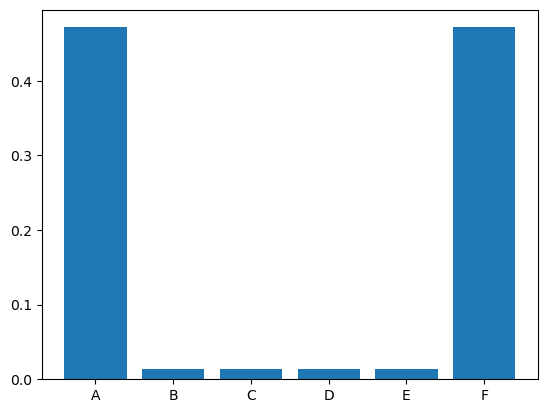

Absolute Entropy: 0.9499004979661841
Relative Entropy: 0.5301495620812489


In [ ]:
from scipy.stats import entropy

grades_count_dict = {'A':100, 'B':3, 'C':3, 'D':3, 'E':3, 'F':100}
grades_count_list = list(grades_count_dict.values())
grades_count_array = np.array(grades_count_list)
n_exams = np.sum(grades_count_array)
grades_freq_array = grades_count_array/n_exams

print(f'grades count array {grades_count_array}')
print(f'grades frequency array {grades_freq_array}')

plt.bar(grades_count_dict.keys(), grades_freq_array)
plt.show()

H = entropy(grades_freq_array)
RH = H/np.log(grades_freq_array.size)

print('Absolute Entropy:', H)
print('Relative Entropy:', RH)